#### Author: Mustafa Radheyyan
#### Date: 04/03/2023
#### Assignment: Cognixia JUMPlus Python Project 1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#### Imports and Constants

If CurrencyConverter is not installed, then uncomment below and install it

In [98]:
# %pip install CurrencyConverter

In [99]:
import pandas as pd

In [100]:
FIFA_PLAYERS_CSV_PATH = 'players_20.csv'

In [101]:
TOP_FIVE = 5
TOP_TEN = 10

Helper functions for displaying Pandas DataFrame and Series objects within a context manager

In [102]:
def force_show_all_columns(df):
    with pd.option_context('display.max_columns', None, 'display.width', None):
        display(df)

In [103]:
def force_show_all_rows(df):
    with pd.option_context('display.max_rows', None, 'display.width', None):
        display(df)

In [104]:
def force_show_max_width(df):
    with pd.option_context('display.max_colwidth', None, 'display.width', None):
        display(df)

In [105]:
def compact_style(df):
    df = (
        df.style.set_table_styles([
            {"selector": "tr", "props": "line-height: 12px;"},
            {"selector": "td,th", "props": "line-height: inherit; padding: 1;"}
]))
    return df

## 1. Load the csv file and show <span style="color:#FF6000;font-style:oblique;">top 5 records</span> from it.

Before setting the index column to be "sofifa_id", I verified that the values of the column were completely unique.

In [106]:
fifa_players_df = pd.read_csv(FIFA_PLAYERS_CSV_PATH)
print(f"The number of unique IDs is: {len(fifa_players_df.sofifa_id.unique())}, compared to the number of rows total: {len(fifa_players_df)}")
fifa_players_df = pd.read_csv(FIFA_PLAYERS_CSV_PATH, index_col='sofifa_id')
fifa_players_df.head()

The number of unique IDs is: 18278, compared to the number of rows total: 18278


,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


## <span style="color:gold;font-style:italic;">Data Cleaning</span>

#### Examining the data types of the DataFrame's columns

In [107]:
print(list(fifa_players_df.columns))

['player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'po

In [108]:
def show_df_dtypes(df):
    dtypes_df = df.dtypes
    dtypes_df = (
        dtypes_df
        .astype("str")
        .to_frame(name="dtype")
    )
    dtypes_df.index.names = ["column"]
    
    dtypes_df = (
        dtypes_df
        .sort_values('dtype', key=lambda col: col.str.lower())
    )
    dtypes_df = compact_style(dtypes_df)
    
    force_show_all_rows(dtypes_df)

In [109]:
show_df_dtypes(fifa_players_df)

,dtype
column,
gk_reflexes,float64
team_jersey_number,float64
contract_valid_until,float64
nation_jersey_number,float64
pace,float64
shooting,float64
passing,float64
release_clause_eur,float64
defending,float64


#### Data Cleaning Functions

Initializing the currency converter with daily Euro FX values

In [110]:
from currency_converter import CurrencyConverter, SINGLE_DAY_ECB_URL

# Load the packaged data (might not be up to date)
c = CurrencyConverter()

# Dowload only the latest available day. Current value is:
# https://www.ecb.europa.eu/stats/eurofxref/eurofxref.zip
c = CurrencyConverter(SINGLE_DAY_ECB_URL)

Helper function to convert currency using passed in arguments

In [111]:
def convert_currency(value, from_cur, to_cur):
    return c.convert(value, from_cur, to_cur)

Testing out the currency function separately

In [112]:
convert_currency(10, 'EUR', 'USD')

10.915

Extract individual unique values from object (string) column formatted as such: "abc, def, ghi"

In [113]:
def extract_csv_column(df: pd.DataFrame):
    df = (
        df.str.split()
          .explode()
          .str.replace(',', "")
          .drop_duplicates()
          )
    return df

Retrieve all of the unique soccer player positions from the DataFrame

In [114]:
player_positions_column = extract_csv_column(fifa_players_df['player_positions']) 
combination_position_column = pd.concat([fifa_players_df['nation_position'], fifa_players_df['team_position'], player_positions_column])
print(list((
    combination_position_column
    .dropna()
    .drop_duplicates()
    .sort_values()
    )))

['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB']


In [115]:
print([column for column in sorted(list(fifa_players_df.columns)) if len(column) <= 3 and (column != "age" and column != "dob")])

['cam', 'cb', 'cdm', 'cf', 'cm', 'lam', 'lb', 'lcb', 'lcm', 'ldm', 'lf', 'lm', 'ls', 'lw', 'lwb', 'ram', 'rb', 'rcb', 'rcm', 'rdm', 'rf', 'rm', 'rs', 'rw', 'rwb', 'st']


In [116]:
position_names_from_columns = ['cam', 'cb', 'cdm', 'cf', 'cm', 'lam', 'lb', 'lcb', 'lcm', 'ldm', 'lf', 'lm', 'ls', 'lw', 'lwb', 'ram', 'rb', 'rcb', 'rcm', 'rdm', 'rf', 'rm', 'rs', 'rw', 'rwb', 'st']
position_names_from_rows = ['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB']

In [117]:
column_position_uppercase = [position.upper() for position in position_names_from_columns]
column_position_uppercase.extend(position_names_from_rows)
unique_position_names = set(column_position_uppercase)
print(sorted(unique_position_names))

['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RES', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST', 'SUB']


Dictionary for replacing abbreviated position names with full words

In [118]:
soccer_position_abbreviation_dict = {
    'CAM': "Center Attacking Midfielder", 'CB': "Center Back", 'CDM': "Center Defending Midfielder", 'CF': "Center Forward",
    'CM': "Center Midfielder", 'GK': "Goalkeeper", 'LAM': "Left Attacking Midfielder", 'LB': "Left Back",
    'LCB': "Left Center Back", 'LCM': "Left Center Midfielder", 'LDM': "Left Defensive Midfielder", 'LF': "Left Forward", 'LM': "Left Midfielder",
    'LS': "Left Striker", 'LW': "Left Wing", 'LWB': "Left Wing Back", 'RAM': "Right Attacking Midfielder", 
    'RB': "Right Back", 'RCB': "Right Center Back", 'RCM': "Right Center Midfielder", 'RDM': "Right Defensive Midfielder",
    'RES': "Reserve", 'RF': "Right Forward", 'RM': "Right Midfielder", 'RS': "Right Striker", 'RW': "Right Wing",
    'RWB': "Right Wing Back", 'ST': "Striker", 'SUB': "Substitute"
}

Make soccer position abbreviation key lowercase and value snake case

In [119]:
column_abbreviation_dict = {key.lower(): soccer_position_abbreviation_dict[key].replace(" ", "_").lower() for key in soccer_position_abbreviation_dict}

In [120]:
real_face_replacement_dict = {
    "Yes": True,
    "No": False
}

Dictionary for replacing data types of DataFrame columns

Ex reasoning: Change type of column "contract_valid_until" from float64 to Int64, requiring a capital I in "Int" in order to accept NaN values

In [121]:
dtype_conversions = {'contract_valid_until': 'Int64',
                     'nation_jersey_number': 'Int64',
                     'nation_position': 'category',
                     'team_position': "category",
                     'player_positions': "category",
                     "club": 'category',
                     "nationality": 'category',
                     "loaned_from": 'category',
                     "preferred_foot": 'category',
                     "body_type": 'category',
                     "work_rate": 'category'}

Dictionary for replacing columns "team_position" and "nation_position" abbreviated values with full words, as well as "real_face" boolean replacement

In [122]:
value_conversions = {
    'team_position': soccer_position_abbreviation_dict,
    'nation_position': soccer_position_abbreviation_dict,
    'real_face': real_face_replacement_dict
}

Line 2: Replace abbreviated column names with full words<br/><br/>
Line 3: Change data types of columns with type conversions<br/><br/>
Line 4: Replace column values with value conversions<br/><br/>
Lines 6-8: Add "salary_eur" column to DataFrame
* Line 6: Only proceed with adding "salary_eur" column if it is not already a column, and if "wage_eur" is a valid column.
* Line 7: Create a "salary_eur" column in the DataFrame by multiplying the "wage_eur" column by 52.
* Line 8: Move "salary_eur" column to index of "wage_eur" column. DataFrame.insert(loc, column, value) where df.pop will return the removed column.<br/>

Lines 10-12: Convert columns to date type
* Line 10: Specify columns to be converted to date type
* Lines 11-12: Change type of DataFrame columns to datetime

In [123]:
def data_cleaning(df):
    df = df.rename(columns=column_abbreviation_dict)
    df = df.astype(dtype_conversions)
    df = df.replace(value_conversions)
    
    if 'salary_eur' not in df.columns and 'wage_eur' in df.columns:
        df['salary_eur'] = df['wage_eur'].multiply(52)
        df.insert(list(df.columns).index("wage_eur"), 'salary_eur', df.pop('salary_eur'))
    
    date_columns = ['dob', 'joined']
    for column in date_columns:
        df[column] = pd.to_datetime(df[column])
    return df

Line 2: Get columns of type datetime64<br/><br/>
Lines 3-4: Change column date format to MM/DD/YYYY (American Standard). This will convert the column to an object type (string) instead of datetime

In [124]:
def americanize_dates(df):
    date_columns = list(df.select_dtypes('datetime64[ns]').columns)
    for column in date_columns:
        df[column] = df[column].dt.strftime('%m/%d/%Y')
    return df

Line 2: Get list of columns which end in "_cm" or "_kg"<br/><br/>
Line 3: Create column replacement dictionary, replacing "_cm" with "_in" and "_kg" with "_lb"<br/><br/>
Lines 5-21: Loop through columns from Line 2 and create new columns as well as convert columns
* Lines 6-18: For "_cm" columns, convert cm to inches and create column to display the "_cm" column in feet (feet and inches)
    * Line 7: Convert column to inches
    * Line 9: Get name of column before "_cm" ending
    * Line 10: Create the new column name for the column to display in feet
    * Line 13: Get a series object of feet by dividing the column with "_cm" column (now converted to inch values) by 12
    * Line 14: Get a series object of inches by modding the column with "_cm" column (now converted to inch values) by 12
    * Line 16: Construct a string feet column (in feet and inches) by adding the series objects from Lines 12-13
    * Line 26: Insert feet column from Line 15 into DataFrame, at the index of the "_cm" column
* Lines 28-29: Convert "_kg" column to pounds (lb)
    * Line 29: Convert column to pounds

Line 31: Rename all columns which ended in "_cm" or "_kg"

In [125]:
def americanize_units(df):
    unit_columns = [column for column in list(df.columns) if column.endswith('_cm') or column.endswith('_kg')]
    american_unit_columns = {column: column.replace('_cm', '_in') if column.endswith("_cm") else column.replace('_kg', '_lb') for column in unit_columns}
    
    for column in unit_columns:
        if column.endswith("_cm"):
            df[column] = round(df[column].multiply(0.393701), 2)
            
            column_identifier = column[:column.rfind('_cm')]
            new_column_name = f'{column_identifier}_feet'
            
            if new_column_name not in list(df.columns):
                feet_series = (df[column].divide(12))
                inches_series = (df[column].mod(12))
                
                feet_column = (
                    feet_series
                    .astype(int)
                    .astype(str)
                    + ' ft ' 
                    + round(inches_series, 1)
                    .astype(str) 
                    + ' in'
                )
                
                df.insert(list(df.columns).index(column), new_column_name, feet_column)
            
        elif column.endswith("_kg"):
            df[column] = round(df[column].multiply(2.20462262185), 2)
            
    df = df.rename(columns=american_unit_columns)
    return df

Line 2: Get list of columns which end in "_eur"<br/><br/>
Line 3: Create column replacement dictionary, replacing "_eur" with "_usd"<br/><br/>
Lines 5-6: Loop through columns from Line 2 ("_eur" columns) and convert columns from EUR to USD
* Line 6: Convert column to USD by applying the convert currency function

Line 7: Rename all columns which ended in "_eur"

In [126]:
def dollarize(df):
    unit_columns = [column for column in list(df.columns) if column.endswith('_eur')]
    usd_columns = {column: column.replace('_eur', '_usd') for column in unit_columns}
    
    for column in unit_columns:
        df[column] = df[column].apply(convert_currency, args=('EUR', 'USD'))
    df = df.rename(columns=usd_columns)
    return df

Line 2: Get DataFrame of replacement weight and height units<br/><br/>
Line 3: Get DataFrame of replaced date values<br/><br/>
Line 4: Get DataFrame of replaced currency values

In [127]:
def americanize(df):
    americanized_df = americanize_units(df)
    americanized_df = americanize_dates(americanized_df)
    americanized_df = dollarize(americanized_df)
    return americanized_df

Perform data cleaning operations

In [128]:
fifa_players_df = data_cleaning(fifa_players_df)
force_show_all_columns(fifa_players_df.head())

column,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,salary_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,29380000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,True,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",Right Wing,10.0,NaN,2004-07-01,2021,NaN,<NA>,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,21060000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,True,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",Left Wing,7.0,NaN,2018-07-10,2022,Left Striker,7,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,15080000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,True,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",Center Attacking Midfielder,10.0,NaN,2017-08-03,2022,Left Wing,10,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,6500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,True,164700000.0,NaN,Goalkeeper,13.0,

Perform "Americanization" of DataFrame columns' units and standards

In [129]:
fifa_players_df = americanize(fifa_players_df)
force_show_all_columns(fifa_players_df.head())

column,player_url,short_name,long_name,age,dob,height_feet,height_in,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,06/24/1987,5 ft 6.9 in,66.93,158.73,Argentina,FC Barcelona,94,94,104238250.0,32068270.0,616697.5,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,True,213715700.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",Right Wing,10.0,NaN,07/01/2004,2021,NaN,<NA>,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,02/05/1985,6 ft 1.6 in,73.62,182.98,Portugal,Juventus,93,93,63852750.0,22986990.0,442057.5,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,True,105329750.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",Left Wing,7.0,NaN,07/10/2018,2022,Left Striker,7,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,02/05/1992,5 ft 8.9 in,68.90,149.91,Brazil,Paris Saint-Germain,92,92,115153250.0,16459820.0,316535.0,"LW, CAM",Right,5,5,5,High/Medium,Neymar,True,213060800.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",Center Attacking Midfielder,10.0,NaN,08/03/2017,2022,Left Wing,10,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,01/07/1993,6 ft 2.0 in,74.02,191.80,Slovenia,Atlético Madri

Saving output to CSV for simple Tableau support

In [130]:
fifa_players_df.to_csv('fifa_players.csv')

Saving output to Parquet for storage and speed optimization

In [131]:
fifa_players_df.to_parquet('fifa_players.parquet')

## 2. How you would be able to see each <span style="color:#FF6000;font-style:oblique;">column's name</span>?

In [132]:
fifa_player_column_list = list(fifa_players_df.reset_index().columns)

In [133]:
print(fifa_player_column_list)

['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_feet', 'height_in', 'weight_lb', 'nationality', 'club', 'overall', 'potential', 'value_usd', 'salary_usd', 'wage_usd', 'player_positions', 'preferred_foot', 'international_reputation', 'weak_foot', 'skill_moves', 'work_rate', 'body_type', 'real_face', 'release_clause_usd', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until', 'nation_position', 'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance'

In [134]:
force_show_all_columns(fifa_players_df.head())

column,player_url,short_name,long_name,age,dob,height_feet,height_in,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,06/24/1987,5 ft 6.9 in,66.93,158.73,Argentina,FC Barcelona,94,94,104238250.0,32068270.0,616697.5,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,True,213715700.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",Right Wing,10.0,NaN,07/01/2004,2021,NaN,<NA>,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,02/05/1985,6 ft 1.6 in,73.62,182.98,Portugal,Juventus,93,93,63852750.0,22986990.0,442057.5,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,True,105329750.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",Left Wing,7.0,NaN,07/10/2018,2022,Left Striker,7,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,02/05/1992,5 ft 8.9 in,68.90,149.91,Brazil,Paris Saint-Germain,92,92,115153250.0,16459820.0,316535.0,"LW, CAM",Right,5,5,5,High/Medium,Neymar,True,213060800.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",Center Attacking Midfielder,10.0,NaN,08/03/2017,2022,Left Wing,10,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,01/07/1993,6 ft 2.0 in,74.02,191.80,Slovenia,Atlético Madri

## 3. Show the <span style="color:#FF6000;font-style:oblique;">number of rows and columns</span> in the dataset. 

In [135]:
fifa_players_df.reset_index().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 106 entries, sofifa_id to right_back
dtypes: Int64(2), bool(1), category(9), float64(19), int64(41), object(34)
memory usage: 13.7+ MB


In [136]:
fifa_players_df.reset_index().shape

(18278, 106)

### Rows

In [137]:
len(fifa_players_df)

18278

### Columns

In [138]:
len(fifa_players_df.reset_index().columns)

106

## 4. Show the <span style="color:#FF6000;font-style:oblique;">number of players in each country</span>.

In [139]:
columns_with_country_string = [column for column in fifa_player_column_list if "nation" in column]
print(columns_with_country_string)
country_column = columns_with_country_string[columns_with_country_string.index("nationality")]

['nationality', 'international_reputation', 'nation_position', 'nation_jersey_number']


In [140]:
fifa_players_countries = (
    fifa_players_df
    .groupby(country_column)
    .size()
    .to_frame(name='player count')
)
print(f"There are {len(fifa_players_countries)} countries and {fifa_players_countries['player count'].sum()} players total.")
force_show_all_rows(compact_style(fifa_players_countries))

There are 162 countries and 18278 players total.


,player count
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
Argentina,886
Armenia,8
Australia,196
Austria,319


## 5. Show the <span style="color:#FF6000;font-style:oblique;">top 10 countries with the highest amount of players</span>.

In [141]:
top_10_player_count_countries = (
    fifa_players_countries
    .nlargest(TOP_TEN, 'player count')
    .reset_index()
    .rename_axis('rank')
)
top_10_player_count_countries.index += 1
top_10_player_count_countries

,nationality,player count
rank,,
1,England,1667
2,Germany,1216
3,Spain,1035
4,France,984
5,Argentina,886
6,Brazil,824
7,Italy,732
8,Colombia,591
9,Japan,453


## 6. Create a <span style="color:#FF6000;font-style:oblique;">bar plot</span> of the top 5 countries with the highest number of players, and fill the bars in green

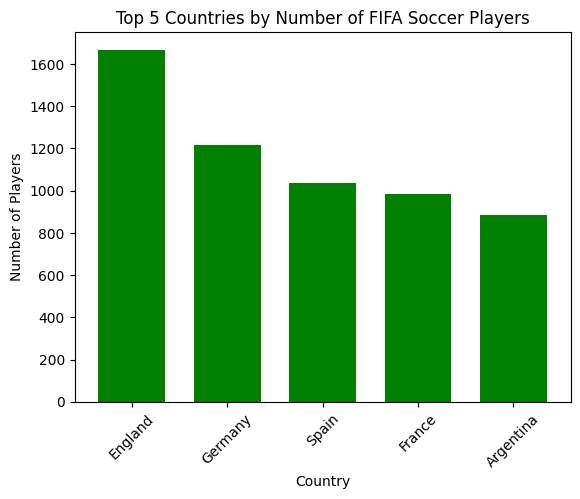

In [142]:
top_5_player_count_countries = top_10_player_count_countries.head()

chart_title = f'Top {TOP_FIVE} Countries by Number of FIFA Soccer Players'
chart_x_label = 'Country'
chart_y_label = 'Number of Players'

ax = top_5_player_count_countries.set_index(country_column).plot.bar(color='green', rot=45, width=0.7, legend=None, title=chart_title, xlabel=chart_x_label, ylabel=chart_y_label)

## 7. Display the short name and wages for the top 5 players.

In [143]:
columns_with_name_string = [column for column in fifa_player_column_list if "name" in column]
print(columns_with_name_string)
short_name_column = columns_with_name_string[columns_with_name_string.index('short_name')]

['short_name', 'long_name']


In [144]:
columns_with_wage_string = [column for column in fifa_player_column_list if "wage" in column]
print(columns_with_wage_string)
wage_column = columns_with_wage_string[columns_with_wage_string.index('wage_usd')]

['wage_usd']


In [145]:
fifa_players_df.head()[[short_name_column, wage_column]]

column,short_name,wage_usd
sofifa_id,,
158023,L. Messi,616697.5
20801,Cristiano Ronaldo,442057.5
190871,Neymar Jr,316535.0
200389,J. Oblak,136437.5
183277,E. Hazard,513005.0


## 8. Display the short name and wages for the top 5 players with the highest salaries.

In [146]:
columns_with_salary_string = [column for column in fifa_player_column_list if "salary" in column]
print(columns_with_salary_string)
salary_column = columns_with_salary_string[columns_with_salary_string.index('salary_usd')]

['salary_usd']


In [147]:
top_5_salaries_players = fifa_players_df[[short_name_column, salary_column]].nlargest(TOP_FIVE, salary_column)
top_5_salaries_players

column,short_name,salary_usd
sofifa_id,,
158023,L. Messi,32068270.0
183277,E. Hazard,26676260.0
20801,Cristiano Ronaldo,22986990.0
192985,K. De Bruyne,21000460.0
194765,A. Griezmann,21000460.0


## 9. Create a bar plot of the previous bullet point.

In [148]:
from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

formatter = FuncFormatter(millions)

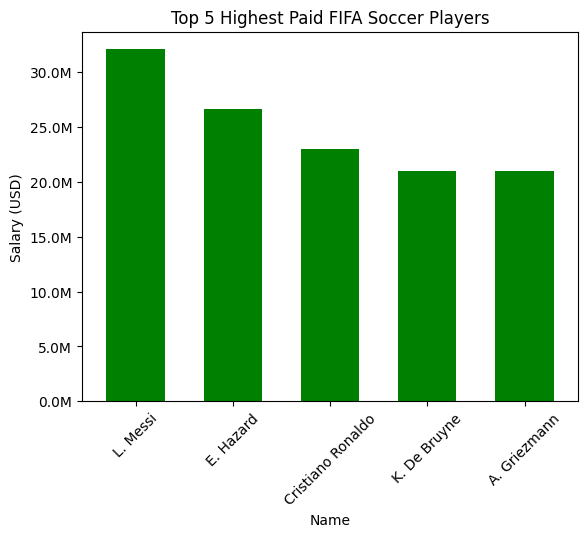

In [149]:
chart_title = f'Top {TOP_FIVE} Highest Paid FIFA Soccer Players'
chart_x_label = 'Name'
chart_y_label = f"Salary ({salary_column[salary_column.rfind('_') + 1:].upper()})"

ax = top_5_salaries_players.set_index(short_name_column).plot.bar(color='green', rot=45, width=0.6, legend=None, title=chart_title, xlabel=chart_x_label, ylabel=chart_y_label)

ax.yaxis.set_major_formatter(formatter)

## 10. Show top 10 records of Germany.

In [150]:
german_fifa_players = fifa_players_df.loc[fifa_players_df[country_column] == 'Germany']
first_ten_german_fifa_players = german_fifa_players.head(TOP_TEN)
force_show_all_columns(first_ten_german_fifa_players)

column,player_url,short_name,long_name,age,dob,height_feet,height_in,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,04/30/1992,6 ft 1.6 in,73.62,187.39,Germany,FC Barcelona,90,93,73676250.0,14189500.0,272875.0,GK,Right,3,4,1,Medium/Medium,Normal,True,156521100.0,NaN,Goalkeeper,1.0,NaN,07/01/2014,2022,Substitute,22,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,03/27/1986,6 ft 4.0 in,75.98,202.83,Germany,FC Bayern München,88,88,34928000.0,8797490.0,169182.5,GK,Right,5,4,1,Medium/Medium,Normal,True,57631200.0,NaN,Goalkeeper,1.0,NaN,07/01/2011,2021,Goalkeeper,1,NaN,NaN,NaN,NaN,NaN,NaN,87.0,87.0,91.0,87.0,57.0,85.0,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182521,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,01/04/1990,6 ft 0.0 in,72.05,167.55,Germany,Real Madrid,88,88,62215500.0,18730140.0,360195.0,CM,Right,4,5,3,Medium/Medium,Normal,True,127596350.0,"#Playmaker , #Crosser, #Complete Midfielder",Left Center Midfielder,8.0,NaN,07/17/2014,2023,Substitute,8,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
188350,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,05/31/1989,5 ft 10.9 in,70.87,156.53,Germany,Borussia Dortmund,88,88,61124000.0,9648860.0,185555.0,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,True,100854600.0,"#Dribbler, #Playmaker , #Distance Shooter, #F...",Center Attacking Midfielder,11.0,NaN,07/01/2012,2023,Striker,11,85.0,88.0,84.0,

## 11. Show the top 5 records of Germany players who have a maximum height, weight and wage

### Maximum height

In [151]:
columns_with_height_string = [column for column in fifa_player_column_list if "height" in column]
print(columns_with_height_string)
height_column = columns_with_height_string[columns_with_height_string.index('height_in')]

['height_feet', 'height_in']


In [152]:
top_height_german_fifa_players = german_fifa_players.nlargest(TOP_FIVE, height_column)
top_height_german_fifa_players.insert(0, height_column, top_height_german_fifa_players.pop(height_column))
force_show_all_columns(top_height_german_fifa_players)

column,height_in,player_url,short_name,long_name,age,dob,height_feet,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
236831,78.35,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,02/07/1996,6 ft 6.3 in,198.42,Germany,1. FSV Mainz 05,67,73,1200650.0,510822.0,9823.5,"ST, LM",Left,1,4,3,Medium/Low,Normal,False,2183000.0,NaN,Substitute,36.0,NaN,11/27/2016,2021,NaN,<NA>,68.0,64.0,53.0,66.0,29.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Crowd Favourite",59,68,69,58,59,69,43,31,35,72,67,69,53,58,34,66,63,51,78,56,55,19,63,59,55,68,25,28,22,12,9,14,11,9,66+2,66+2,66+2,64+2,65+2,65+2,65+2,64+2,62+2,62+2,62+2,62+2,54+2,54+2,54+2,62+2,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
200212,77.95,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,11/22/1987,6 ft 6.0 in,213.85,Germany,Hannover 96,77,77,6003250.0,1305434.0,25104.5,GK,Right,1,3,1,Medium/Medium,Normal,True,9605200.0,NaN,Substitute,23.0,NaN,07/01/2017,2020,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,77.0,74.0,64.0,82.0,41.0,75.0,Flair,10,8,25,39,9,15,14,17,35,17,32,48,30,72,28,48,67,37,82,19,40,30,6,48,23,53,20,15,16,77,74,64,75,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199833,77.95,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,07/20/1990,6 ft 6.0 in,227.08,Germany,PSV,76,78,7094750.0,794612.0,15281.0,GK,Right,1,1,1,Medium/Medium,Stocky,False,10478400.0,NaN,Substitute,13.0,NaN,07/01/2018,2021,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,76.0,75.0,72.0,77.0,33.0,74.0,NaN,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,76,75,72,74,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179783,77.56,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,09/27/1988,6 ft 5.6 in,216.05,Germany,Norwich City,80,80,10915000.0,2440594.0,46934.5,GK,Right,2,1,1,Medium/Medium,Normal,True,NaN,NaN,Substitute,21.0,FC Schalke 04,NaN,2020,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,82.0,79.0,44.0,84.0,43.0,79.0,"Giant Throw-in, Acrobatic Clearance, Flair Passes",14,11,15,25,11,15,18,11,26,24,38,47,39,81,36,33,72,32,79,9,36,23,11,42,21,61,10,12,10,82,79,44,79,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

### Maximum weight

In [153]:
columns_with_weight_string = [column for column in fifa_player_column_list if "weight" in column]
print(columns_with_weight_string)
weight_column = columns_with_weight_string[columns_with_weight_string.index('weight_lb')]

['weight_lb']


In [154]:
top_weight_german_fifa_players = german_fifa_players.nlargest(TOP_FIVE, weight_column)
top_weight_german_fifa_players.insert(0, weight_column, top_weight_german_fifa_players.pop(weight_column))
force_show_all_columns(top_weight_german_fifa_players)

column,weight_lb,player_url,short_name,long_name,age,dob,height_feet,height_in,nationality,club,overall,potential,value_usd,salary_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
199833,227.08,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,07/20/1990,6 ft 6.0 in,77.95,Germany,PSV,76,78,7094750.0,794612.0,15281.0,GK,Right,1,1,1,Medium/Medium,Stocky,False,10478400.0,NaN,Substitute,13.0,NaN,07/01/2018,2021,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,76.0,75.0,72.0,77.0,33.0,74.0,NaN,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,76,75,72,74,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239746,227.08,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,03/06/1996,6 ft 5.6 in,77.56,Germany,SV Wehen Wiesbaden,62,68,354737.5,113516.0,2183.0,GK,Right,1,3,1,Medium/Medium,Stocky,False,621063.5,NaN,Goalkeeper,1.0,NaN,07/01/2017,2021,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,59.0,59.0,57.0,66.0,22.0,63.0,NaN,13,7,13,19,5,10,11,12,25,18,20,23,18,54,19,43,27,26,83,8,32,6,6,32,15,21,7,13,13,59,59,57,63,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179783,216.05,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,09/27/1988,6 ft 5.6 in,77.56,Germany,Norwich City,80,80,10915000.0,2440594.0,46934.5,GK,Right,2,1,1,Medium/Medium,Normal,True,NaN,NaN,Substitute,21.0,FC Schalke 04,NaN,2020,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,82.0,79.0,44.0,84.0,43.0,79.0,"Giant Throw-in, Acrobatic Clearance, Flair Passes",14,11,15,25,11,15,18,11,26,24,38,47,39,81,36,33,72,32,79,9,36,23,11,42,21,61,10,12,10,82,79,44,79,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212190,213.85,https://sofifa.com/player/212190/niklas-sule/2...,N. Süle,Niklas Süle,23,09/03/1995,6 ft 4.8 in,76.77,Germany,FC Bayern München,85,90,50754750.0,6527170.0,125522.5,CB,Right,2,3,2,Medium/Medium,Stocky,True,87538300.0,"#Aerial Threat, #Tackling , #Strength",Right Center Back,4.0,NaN,07/01/2017,2022,Right Center Back,15,72.0,42.0,55.0,50.0,86.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34,22,86,78,33,43,28,30,69,63,53,87,34,81,33,77,40,66,94,62,83,81,26,40,32,75,85,89,87,15,7,14,7,15,57+2,57+2,57+2,50+2,53+2,53+2,53+2,50+2,54+2,54+2,54+2,54+2,62+2,62+2,62+2,54+2,71+2

### Maximum wages

In [155]:
top_wage_german_fifa_players = german_fifa_players.nlargest(TOP_FIVE, wage_column)
top_wage_german_fifa_players.insert(0, wage_column, top_wage_german_fifa_players.pop(wage_column))
force_show_all_columns(top_wage_german_fifa_players)

column,wage_usd,player_url,short_name,long_name,age,dob,height_feet,height_in,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
182521,360195.0,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,01/04/1990,6 ft 0.0 in,72.05,167.55,Germany,Real Madrid,88,88,62215500.0,18730140.0,CM,Right,4,5,3,Medium/Medium,Normal,True,127596350.0,"#Playmaker , #Crosser, #Complete Midfielder",Left Center Midfielder,8.0,NaN,07/17/2014,2023,Substitute,8,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
192448,272875.0,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,04/30/1992,6 ft 1.6 in,73.62,187.39,Germany,FC Barcelona,90,93,73676250.0,14189500.0,GK,Right,3,4,1,Medium/Medium,Normal,True,156521100.0,NaN,Goalkeeper,1.0,NaN,07/01/2014,2022,Substitute,22,NaN,NaN,NaN,NaN,NaN,NaN,88.0,85.0,88.0,90.0,45.0,88.0,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222492,212842.5,https://sofifa.com/player/222492/leroy-sane/20...,L. Sané,Leroy Sané,23,01/11/1996,6 ft 0.0 in,72.05,165.35,Germany,Manchester City,86,92,66581500.0,11067810.0,LW,Left,2,3,4,High/Medium,Lean,True,136546650.0,"#Speedster, #Dribbler, #Acrobat",Substitute,19.0,NaN,08/02/2016,2021,Left Wing,19,95.0,81.0,79.0,86.0,38.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Early Crosser",83,81,72,80,85,88,83,82,64,85,93,96,86,81,80,87,64,78,70,78,61,34,84,82,71,80,36,32,35,8,12,9,9,14,82+2,82+2,82+2,84+2,84+2,84+2,84+2,84+2,83+2,83+2,83+2,83+2,74+2,74+2,74+2,83+2,65+2,59+2,59+2,59+2,65+2,61+2,52+2,52+2,52+2,61+2
186942,196470.0,https://sofifa.com/player/186942/ilkay-gundoga...,I. Gündoğan,İlkay Gündoğan,28,10/24/1990,5 ft 10.9 in,70.87,176.37,Germany,Manchester City,84,84,33836500.0,10216440.0,"CM, CDM",Right,3,4,4,High/Medium,Normal,True,62652100.0,#Playmaker,Substitute,8.0,NaN,07/01/2016,2023,Left Center Midfielder,21,66.0,74.0,84.0,84.0,

## 12. Display the short name and wages of the top 5 Germany players.

In [156]:
first_five_german_fifa_players = first_ten_german_fifa_players.head()
first_five_german_fifa_players[[short_name_column, wage_column]]

column,short_name,wage_usd
sofifa_id,,
192448,M. ter Stegen,272875.0
167495,M. Neuer,169182.5
182521,T. Kroos,360195.0
188350,M. Reus,185555.0
178603,M. Hummels,141895.0


## 13. Show top 5 players who have the best shooting skills among all the players with short names.

In [157]:
columns_with_soccer_shoot_string = [column for column in fifa_player_column_list if "shoot" in column]
print(columns_with_soccer_shoot_string)
soccer_shooting_column = columns_with_soccer_shoot_string[columns_with_soccer_shoot_string.index('shooting')]

['shooting']


In [158]:
top_5_players_shooting = (
    fifa_players_df
    .dropna(subset=[short_name_column])
    .sort_values(soccer_shooting_column, ascending=False)
    .head()
)
top_5_players_shooting.insert(0, soccer_shooting_column, top_5_players_shooting.pop(soccer_shooting_column))
force_show_all_columns(top_5_players_shooting)

column,shooting,player_url,short_name,long_name,age,dob,height_feet,height_in,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20801,93.0,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,02/05/1985,6 ft 1.6 in,73.62,182.98,Portugal,Juventus,93,93,63852750.0,22986990.0,442057.5,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,True,105329750.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",Left Wing,7.0,NaN,07/10/2018,2022,Left Striker,7,90.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
158023,92.0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,06/24/1987,5 ft 6.9 in,66.93,158.73,Argentina,FC Barcelona,94,94,104238250.0,32068270.0,616697.5,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,True,213715700.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",Right Wing,10.0,NaN,07/01/2004,2021,NaN,<NA>,87.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
202126,91.0,https://sofifa.com/player/202126/harry-kane/20...,H. Kane,Harry Kane,25,07/28/1993,6 ft 2.0 in,74.02,196.21,England,Tottenham Hotspur,89,91,90594500.0,12486760.0,240130.0,ST,Right,3,4,3,High/High,Normal,True,174421700.0,"#Engine, #Distance Shooter, #Clinical Finisher",Striker,10.0,NaN,07/01/2010,2024,Striker,9,70.0,79.0,81.0,47.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Free, Avoids Using Weaker Foot, Argues ...",75,94,86,81,85,80,78,68,83,84,68,72,71,91,73,90,79,87,84,86,78,35,93,81,90,91,56,36,38,8,10,11,14,11,86+3,86+3,86+3,82+3,84+3,84+3,84+3,82+3,83+3,83+3,83+3,82+3,79+3,79+3,79+3,82+3,65+3,66+3,66+3,66+3,65+3,62+3,60+3,60+3,60+3,62+3
153079,90.0,https://sofifa.com/player/153079/sergio-aguero...,S. Agüero,Sergio Leonel Agüero del Castillo,31,06/02/1988,5 ft 8.1 in,68.11,154.32,Argentina,Manchester City,89,89,65490000.0,170274

## 14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills.

In [159]:
columns_with_soccer_defend_string = [column for column in fifa_player_column_list if "defend" in column]
print(columns_with_soccer_defend_string)
soccer_defending_column = columns_with_soccer_defend_string[columns_with_soccer_defend_string.index('defending')]

['defending', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'center_defending_midfielder']


In [160]:
top_5_players_defending = (
    fifa_players_df
    .dropna(subset=[short_name_column])
    .nlargest(TOP_FIVE, soccer_defending_column)
)
top_5_players_defending[[short_name_column, soccer_defending_column, country_column, "club"]]

column,short_name,defending,nationality,club
sofifa_id,,,,
203376,V. van Dijk,90.0,Netherlands,Liverpool
138956,G. Chiellini,90.0,Italy,Juventus
201024,K. Koulibaly,89.0,Senegal,Napoli
182493,D. Godín,89.0,Uruguay,Inter
178603,M. Hummels,89.0,Germany,Borussia Dortmund


## 15. Show wage records of the top 5 players of the 'Real Madrid' team

In [161]:
TEAM_NAME = 'Real Madrid'

Checks which columns the "Real Madrid" value is located in (lines 1-7) and assigns it to the most relevant column (line 9)

In [162]:
real_madrid_column_list = list((
    fifa_players_df
    .columns[
        fifa_players_df
        .isin([TEAM_NAME])
        .any()
        ]))
print(real_madrid_column_list)
real_madrid_column = real_madrid_column_list[real_madrid_column_list.index('club')]

['club', 'loaned_from']


Get DataFrame where 'club' column values are equal to "Real Madrid"

In [163]:
real_madrid_df = fifa_players_df.loc[fifa_players_df[real_madrid_column] == TEAM_NAME]

In [164]:
top_wage_real_madrid_players = real_madrid_df.nlargest(TOP_FIVE, wage_column)
top_wage_real_madrid_players.insert(0, wage_column, top_wage_real_madrid_players.pop(wage_column))
force_show_all_columns(top_wage_real_madrid_players)

column,wage_usd,player_url,short_name,long_name,age,dob,height_feet,height_in,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
183277,513005.0,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,01/07/1991,5 ft 8.9 in,68.90,163.14,Belgium,Real Madrid,91,91,98235000.0,26676260.0,"LW, CF",Right,4,4,4,High/Medium,Normal,True,201381750.0,"#Speedster, #Dribbler, #Acrobat",Left Wing,7.0,NaN,07/01/2019,2024,Left Forward,10,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
177003,371110.0,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,33,09/09/1985,5 ft 7.7 in,67.72,145.51,Croatia,Real Madrid,90,90,49117500.0,19297720.0,CM,Right,4,4,4,High/High,Lean,True,100745450.0,"#Dribbler, #Playmaker , #Crosser, #Acrobat, #...",Right Center Midfielder,10.0,NaN,08/01/2012,2020,NaN,<NA>,74.0,76.0,89.0,89.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Speed Dri...",86,72,55,92,76,87,85,78,88,92,77,71,92,89,93,79,68,85,58,82,62,82,79,91,82,92,68,76,71,13,9,7,14,9,77+3,77+3,77+3,84+3,83+3,83+3,83+3,84+3,86+3,86+3,86+3,85+3,87+3,87+3,87+3,85+3,81+3,81+3,81+3,81+3,81+3,79+3,72+3,72+3,72+3,79+3
182521,360195.0,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,01/04/1990,6 ft 0.0 in,72.05,167.55,Germany,Real Madrid,88,88,62215500.0,18730140.0,CM,Right,4,5,3,Medium/Medium,Normal,True,127596350.0,"#Playmaker , #Crosser, #Complete Midfielder",Left Center Midfielder,8.0,NaN,07/17/2014,2023,Substitute,8,45.0,80.0,90.0,81.0,70.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
155862,327450.0,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,03/30/1986,6 ft 0.4 in,72.44,180.78,Spain,Real Madrid,89,89,34382250.0,17027400.0,CB,Right,4,3,3,High/Medium,Normal,True,70510900.0,"#Aerial Threat, #

## 16. Show shooting records of top 5 players of 'Real Madrid' team.

In [165]:
top_shooting_real_madrid_players = real_madrid_df.nlargest(TOP_FIVE, soccer_shooting_column)
top_shooting_real_madrid_players.insert(0, soccer_shooting_column, top_shooting_real_madrid_players.pop(soccer_shooting_column))
force_show_all_columns(top_shooting_real_madrid_players)

column,shooting,player_url,short_name,long_name,age,dob,height_feet,height_in,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
173731,87.0,https://sofifa.com/player/173731/gareth-bale/2...,G. Bale,Gareth Frank Bale,29,07/16/1989,6 ft 0.8 in,72.83,180.78,Wales,Real Madrid,85,85,40931250.0,14189500.0,272875.0,"RW, LW, ST",Left,4,3,4,Medium/Medium,Lean,True,83936350.0,"#Speedster, #Distance Shooter, #Crosser, #FK S...",Substitute,11.0,NaN,09/02/2013,2022,Right Midfielder,11,91.0,82.0,82.0,58.0,76.0,NaN,NaN,NaN,NaN,NaN,NaN,"Inflexible, Power Free-Kick, Argues with Offic...",86,84,84,81,85,83,90,87,80,84,90,91,79,80,65,92,86,73,80,90,65,59,85,79,76,85,54,55,52,15,15,11,5,6,84+3,84+3,84+3,84+3,84+3,84+3,84+3,84+3,82+3,82+3,82+3,83+3,78+3,78+3,78+3,83+3,72+3,69+3,69+3,69+3,72+3,70+3,66+3,66+3,66+3,70+3
198710,86.0,https://sofifa.com/player/198710/james-rodrigu...,J. Rodríguez,James David Rodríguez Rubio,27,07/12/1991,5 ft 10.9 in,70.87,165.35,Colombia,Real Madrid,85,85,44205750.0,12770550.0,245587.5,"CAM, CM, RM",Left,4,2,4,Medium/Medium,Normal,True,90594500.0,"#Playmaker , #Distance Shooter, #Crosser, #FK...",Substitute,16.0,NaN,07/22/2014,2020,Center Attacking Midfielder,10,55.0,87.0,86.0,50.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Selfish, Finesse Shot, Speed Dribbler (CPU AI ...",90,83,62,86,90,85,89,86,83,90,57,54,80,84,76,86,46,65,64,92,60,55,80,86,81,87,52,41,44,15,15,15,5,14,78+3,78+3,78+3,81+3,81+3,81+3,81+3,81+3,83+3,83+3,83+3,80+3,80+3,80+3,80+3,80+3,67+3,67+3,67+3,67+3,67+3,62+3,57+3,57+3,57+3,62+3
183277,83.0,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,01/07/1991,5 ft 8.9 in,68.90,163.14,Belgium,Real Madrid,91,91,98235000.0,26676260.0,513005.0,"LW, CF",Right,4,4,4,High/Medium,Normal,True,201381750.0,"#Speedster, #Dribbler, #Acrobat",Left Wing,7.0,NaN,07/01/2019,2024,Left Forward,10,91.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish, Finesse Shot, Spee...",81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
165153,82.0,https://sofifa.com/player/165153/karim-benzema...,K. Benzema,Karim Benzema,31,12/19/1987,6 ft 0.8 in,72.83,178.57,France,Real Madrid,87,87,49117500.0,16176030.0,311077.5,"CF, ST",Rig

## 17. Show defending records of top 5 players of 'Real Madrid' team.

In [166]:
top_defending_real_madrid_players = real_madrid_df.nlargest(TOP_FIVE, soccer_defending_column)
top_defending_real_madrid_players.insert(0, soccer_defending_column, top_defending_real_madrid_players.pop(soccer_defending_column))
force_show_all_columns(top_defending_real_madrid_players)

column,defending,player_url,short_name,long_name,age,dob,height_feet,height_in,weight_lb,nationality,club,overall,potential,value_usd,salary_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,left_striker,striker,right_striker,left_wing,left_forward,center_forward,right_forward,right_wing,left_attacking_midfielder,center_attacking_midfielder,right_attacking_midfielder,left_midfielder,left_center_midfielder,center_midfielder,right_center_midfielder,right_midfielder,left_wing_back,left_defensive_midfielder,center_defending_midfielder,right_defensive_midfielder,right_wing_back,left_back,left_center_back,center_back,right_center_back,right_back
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
155862,87.0,https://sofifa.com/player/155862/sergio-ramos-...,Sergio Ramos,Sergio Ramos García,33,03/30/1986,6 ft 0.4 in,72.44,180.78,Spain,Real Madrid,89,89,34382250.0,17027400.0,327450.0,CB,Right,4,3,3,High/Medium,Normal,True,70510900.0,"#Aerial Threat, #Tackling , #Tactician , #Comp...",Left Center Back,4.0,NaN,08/01/2005,2020,Right Center Back,15,72.0,68.0,75.0,73.0,85.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Avoids Using Weaker Foot, Leader...",66,63,92,80,69,65,74,72,83,83,74,71,78,87,66,79,93,80,85,62,90,88,67,71,86,84,85,87,90,11,8,9,7,11,74+3,74+3,74+3,72+3,73+3,73+3,73+3,72+3,74+3,74+3,74+3,73+3,78+3,78+3,78+3,73+3,80+3,84+3,84+3,84+3,80+3,82+3,87+3,87+3,87+3,82+3
200145,85.0,https://sofifa.com/player/200145/carlos-henriq...,Casemiro,Carlos Henrique Venancio Casimiro,27,02/23/1992,6 ft 0.8 in,72.83,185.19,Brazil,Real Madrid,87,89,58395250.0,13621920.0,261960.0,CDM,Right,3,3,2,Medium/High,Normal,True,124103550.0,"#Tackling , #Tactician , #Strength, #Complete ...",Center Defending Midfielder,14.0,NaN,07/11/2013,2021,NaN,<NA>,62.0,72.0,75.0,72.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Injury Prone, Argues with Offic...",58,64,76,83,61,69,63,74,82,78,58,66,62,86,66,86,87,88,90,81,89,86,69,77,66,84,84,87,86,13,14,16,12,12,74+3,74+3,74+3,71+3,74+3,74+3,74+3,71+3,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,78+3,84+3,84+3,84+3,78+3,79+3,84+3,84+3,84+3,79+3
201535,85.0,https://sofifa.com/player/201535/raphael-varan...,R. Varane,Raphaël Varane,26,04/25/1993,6 ft 3.2 in,75.20,178.57,France,Real Madrid,85,90,49117500.0,11635390.0,223757.5,CB,Right,3,3,2,Medium/High,Lean,True,104347400.0,#Tackling,Right Center Back,5.0,NaN,07/01/2011,2022,Right Center Back,4,83.0,45.0,62.0,63.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,40,83,75,42,55,46,52,76,77,79,86,63,83,38,52,79,72,86,53,77,82,44,59,43,84,87,86,85,11,11,9,5,14,62+3,62+3,62+3,61+3,62+3,62+3,62+3,61+3,64+3,64+3,64+3,64+3,69+3,69+3,69+3,64+3,74+3,79+3,79+3,79+3,74+3,77+3,83+3,83+3,83+3,77+3
204963,82.0,https://sofifa.com/player/204963/daniel-carvaj...,Carvajal,Daniel Carvajal Ramos,27,01/11/1992,5 ft 8.1 in,68.11,160.94,Spain,Real Madrid,85,86,41477000.0,11635390.0,223757.5,RB,Right,3,3,3,High/High,Stocky,True,88193200.0,#Engine,Right Back,2.0,NaN,07/05/20

## 18. Show nationality records of top 5 players of 'Real Madrid' team.

In [167]:
real_madrid_players_nationality = real_madrid_df.head()[[country_column, short_name_column, real_madrid_column, "player_url"]]

In [168]:
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

Webscrape Wikipedia page for flag of countries in DataFrame and save this URL value to DataFrame column "flag"

In [169]:
import requests
from bs4 import BeautifulSoup

flag_list = []

for item in real_madrid_players_nationality[country_column]:
    url = 'https://en.wikipedia.org/wiki/File:Flag_of_' + str(item) + '.svg'
    r = requests.get(url)
    soup = BeautifulSoup(r.text, "lxml")
    
    flag_url = soup.find('span', {'class':'mw-filepage-other-resolutions'}).findAll('a')[0]['href']
    flag_list.append(flag_url)
    
real_madrid_players_nationality['flag'] = flag_list

In [170]:
force_show_max_width(real_madrid_players_nationality)
real_madrid_players_nationality['flag'] = flag_list

column,nationality,short_name,club,player_url,flag
sofifa_id,,,,,
183277,Belgium,E. Hazard,Real Madrid,https://sofifa.com/player/183277/eden-hazard/20/159586,//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Belgium.svg/277px-Flag_of_Belgium.svg.png
177003,Croatia,L. Modrić,Real Madrid,https://sofifa.com/player/177003/luka-modric/20/159586,//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/320px-Flag_of_Croatia.svg.png
155862,Spain,Sergio Ramos,Real Madrid,https://sofifa.com/player/155862/sergio-ramos-garcia/20/159586,//upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/320px-Flag_of_Spain.svg.png
192119,Belgium,T. Courtois,Real Madrid,https://sofifa.com/player/192119/thibaut-courtois/20/159586,//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Belgium.svg/277px-Flag_of_Belgium.svg.png
182521,Germany,T. Kroos,Real Madrid,https://sofifa.com/player/182521/toni-kroos/20/159586,//upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/320px-Flag_of_Germany.svg.png


Function to make URL clickable and to open in browser in a new tab

In [171]:
def make_clickable(url, name):
    if not (bool(BeautifulSoup(name, "html.parser").find())):
        return '<a href="{}" rel="noopener noreferrer" target="_blank">{}</a>'.format(url,name)
    else:
        return name

Line 3: Apply make_clickable function to "short_name" column so that the player's sofifa URL is accessible through the "short_name" column value<br></br>
Line 5: Display HTML rendering of DataFrame with the flag URL being displayed as an image<br></br>

In [172]:
from IPython.core.display import HTML

real_madrid_players_nationality['short_name'] = real_madrid_players_nationality.apply(lambda x: make_clickable(x['player_url'], x['short_name']), axis=1)

HTML(real_madrid_players_nationality[[real_madrid_column, short_name_column, country_column, 'flag']].to_html(escape=False, formatters=dict(flag=path_to_image_html)))

column,club,short_name,nationality,flag
sofifa_id,,,,
183277,Real Madrid,E. Hazard,Belgium,
177003,Real Madrid,L. Modrić,Croatia,
155862,Real Madrid,Sergio Ramos,Spain,
192119,Real Madrid,T. Courtois,Belgium,
182521,Real Madrid,T. Kroos,Germany,


## Extensions

### Player age versus average salary line graph

Plots age vs average salary line graph, using the count of age as the color gradient for the line

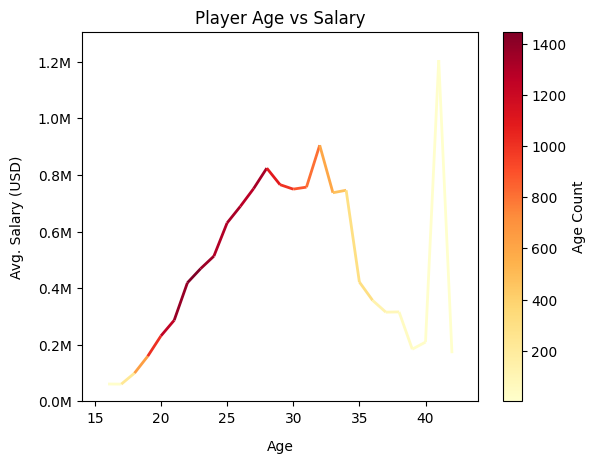

In [173]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

x = fifa_players_df.groupby('age')[salary_column].mean(salary_column).index.to_numpy() # Array of ages
y = fifa_players_df.groupby('age')[salary_column].mean(salary_column).to_numpy() # Array of average salaries
dydx = fifa_players_df.groupby('age').size().to_numpy()  # Array of count of age

# Create a set of line segments so that we can color them individually
# This creates the points as an N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots()

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='YlOrRd', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = ax.add_collection(lc)
axcb = fig.colorbar(line, ax=ax)
axcb.set_label('Age Count')

ax.set_xlim(x.min() - 2, x.max() + 2)
ax.set_ylim(0, y.max() + 100000)

ax.set_xlabel("Age", labelpad=10)
ax.set_ylabel("Avg. Salary (USD)", labelpad=10)
ax.yaxis.set_major_formatter(formatter)

ax.set_title('Player Age vs Salary')

plt.show()

### Player Positions Count and Average Salary

In [233]:
player_positions_count = fifa_players_df["player_positions"].str.count(',') + 1
player_positions_count

sofifa_id
158023    3
20801     2
190871    2
200389    1
183277    2
         ..
245006    1
250995    1
252332    1
251110    1
233449    1
Name: player_positions, Length: 18278, dtype: int64

In [252]:
salary_position_count = pd.DataFrame([player_positions_count, fifa_players_df[salary_column]]).transpose()
salary_position_count
avg_salary_num_positions = salary_position_count.groupby("player_positions").mean().astype(int).rename(columns={"salary_usd": "avg_salary_usd"})
avg_salary_num_positions

,avg_salary_usd
player_positions,
1.0,477461
2.0,591160
3.0,628936


In [258]:
bar_labels = '$' + avg_salary_num_positions["avg_salary_usd"].apply(lambda x: "{:,}".format(x)).astype(str)
bar_labels

player_positions
1.0    $477,461
2.0    $591,160
3.0    $628,936
Name: avg_salary_usd, dtype: object

Plots histogram of player positions count, with a bar label of average salary

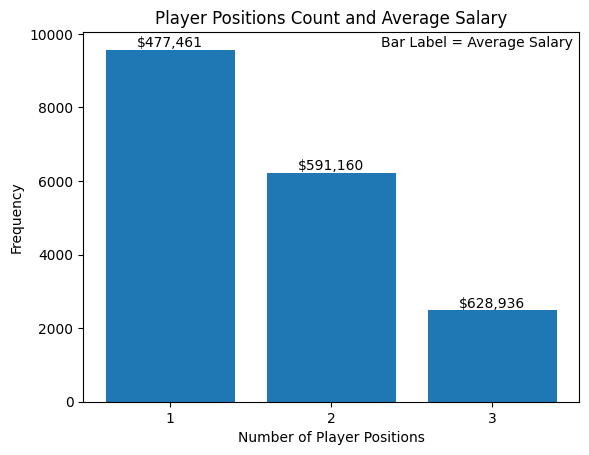

In [282]:
labels, counts = np.unique(player_positions_count, return_counts=True)

ax = plt.subplot()

vbars = ax.bar(labels, counts, align='center')

ax.set_title("Player Positions Count and Average Salary")
ax.set_xlabel("Number of Player Positions")
ax.set_ylabel("Frequency")

ax.set_xticks(labels)
ax.bar_label(vbars, bar_labels)
plt.figtext(.59, .85, "Bar Label = Average Salary")

plt.show()